In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import firwin, firwin2, convolve, freqz

In [19]:
t = np.linspace(0,200*np.pi,1000) # number of timesteps in the sine signal
"""SAMPLING RATE = NUMBER OF SAMPLES/SAMPLING TIME PERIOD = 1000/(200*pi)"""

slow_time_period = 64
fast_time_period = 6

x = 10*np.sin(2*np.pi*t/slow_time_period) + 4*np.sin(2*np.pi*t/fast_time_period) # this is the sine signal with multiple frequencies
control = 10*np.sin(2*np.pi*(1/64)*t) # this is just the low frequency part of the signal, we'll use this to confirm that our filter recovers the lf part

Implicit assumption made here by the notebook creator (Kashika): the sampling_frequency (1/sampling_period) is 1 by default.

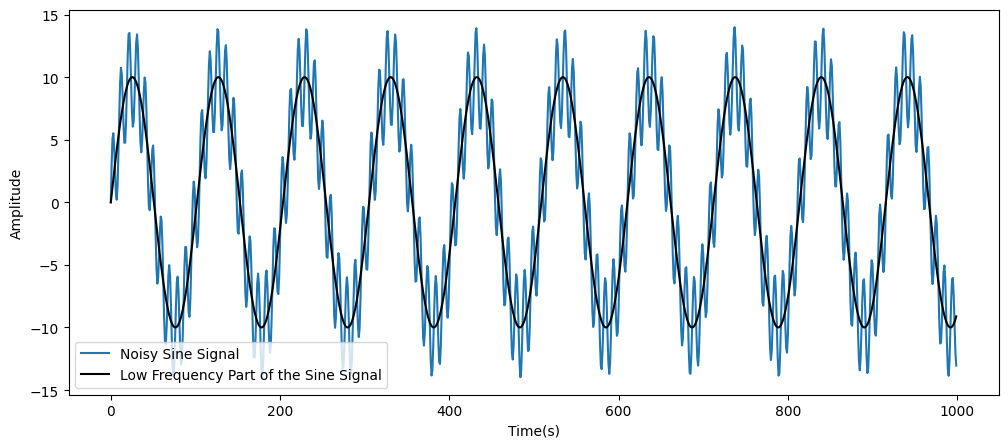

In [20]:
plt.figure(figsize=(12,5))
plt.plot(x, label = 'Noisy Sine Signal')
plt.plot(control, label = 'Low Frequency Part of the Sine Signal',c='k')
plt.ylabel('Amplitude')
plt.xlabel('Time(s)')
plt.legend()

In [21]:
sampling_rate = 1 # since the number of samples per time interval is 1
"""MOVE THIS TO THE EARLIER PART DEFINED IN THE LINSPACE FUNCTION
- BECAUSE AS IT STANDS, THE SAMPLING RATE IS NOT ACTUALLY 1"""

cutoff_time_period = 10
"""DEFINED THE DIFFERENCE BETWEEN A SIGNAL AND JUST NOISE"""

cutoff_frequency = 1/cutoff_time_period # this is the frequency at which the the signal starts to get attenuated
numtaps = 81 # this is the order of the filter
"""81 SAMPLES - HOW 'LONG' WE WANT OUR FILTER TO BE"""

"""LENGTH OF THE FILTER = 'ORDER' OF THE FILTER"""
coefficients = firwin(numtaps, cutoff_frequency, window='blackman', pass_zero='lowpass',fs=sampling_rate) #creating the filter using scipy.firwin
"""LOW PASS FILTER -> THINGS THAT ARE SLOWER THAN THE CUTOFF_TIME_PERIOD"""
filtered_data = convolve(coefficients,x, mode = 'valid') # applying the filter using convolution
"""THEN WE DO A CONVOLUTION AFTER DESIGNING OUR FILTER
'MODE' REFLECTS THE FACT THAT BOTH OUR SIGNALS ARE FINITE IN LENGTH"""

"""YOU LOSE 40 SAMPLES ON BOTH SIDES FOR MODE='VALID', GIVEN THAT NUMTAPS=81"""

"YOU LOSE 40 SAMPLES ON BOTH SIDES FOR MODE='VALID', GIVEN THAT NUMTAPS=81"

Text(0, 0.5, 'Coefficient')

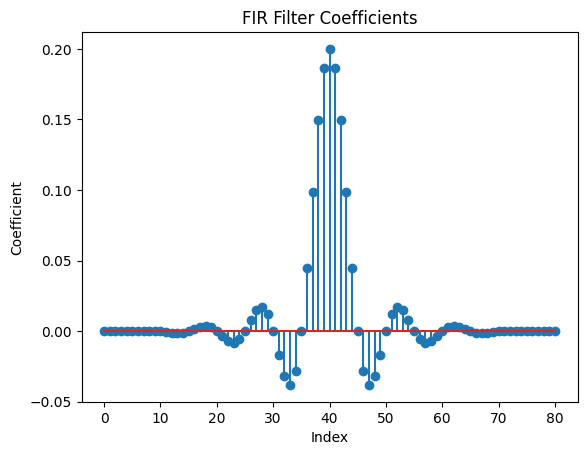

In [37]:
%matplotlib inline
plt.stem(coefficients) # this plots the values of the coefficients of the FIR filter we created
plt.title('FIR Filter Coefficients')
plt.xlabel('Index')
plt.ylabel('Coefficient')

To convert from amplitude to decibels, you have to use the formula

$dB = 20*log_{10}(A)$

'ANYTHING BEYOND THAT FREQUENCY AROUND 0.1, IS ATTENUATED VERY STRONGLY'

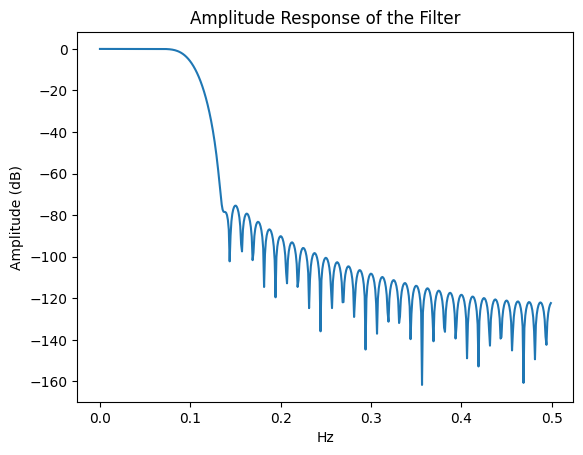

In [ ]:
%matplotlib inline
w,h = signal.freqz(coefficients,fs = sampling_rate) 
#THIS FUNCTION CALCULATES THE AMPLITUDE RESPONSE OF THE FILTER, 
#WHERE w CONTAINS THE FREQUENCIES AT WHICH THE FREQUENCY RESPONSE IS EVALUATED,
#AND h CONTAINS THE FREQUENCY RESPONSE OF THE FILTER AT EACH FREQUENCY
plt.plot(w, 20*np.log10(abs(h)))
#WE CONVERT THE AMPLITUDE INTO DECIBELS IMPLICITLY IN THE PLOTTING FUNCTION
plt.ylabel('Amplitude (dB)')
plt.xlabel('Hz')
plt.title('Amplitude Response of the Filter')

"""ANYTHING BEYOND THAT FREQUENCY AROUND 0.1, IS ATTENUATED VERY STRONGLY"""

Sampling Frequency was earlier defined as 1, but here it is reflected only up to 0.5

-> the highest frequency signal you can actually represent in your data is half the sampling frequency!!!

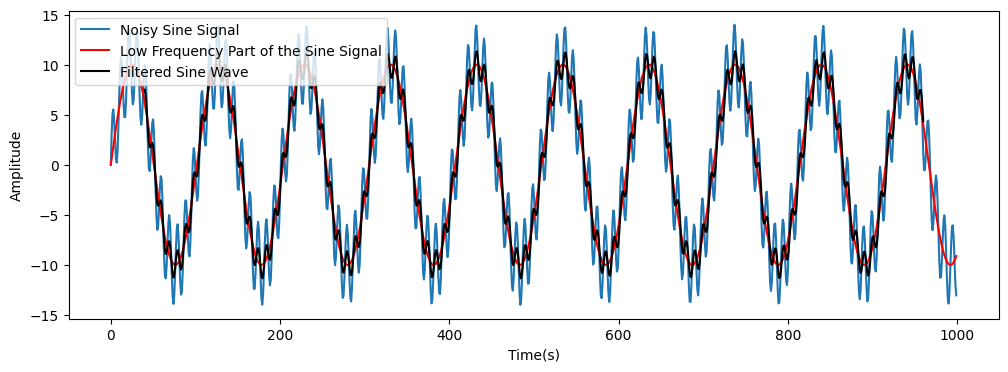

In [31]:
%matplotlib inline
plt.figure(figsize=(12,4))

lag = np.linspace((numtaps-1)/2,len(control)-((numtaps-1)/2),len(filtered_data)) #lag created due to using valid mode during convolution (check the length of the arrays before and after convolution)
plt.plot(x,label='Noisy Sine Signal')
plt.plot(control,'r',label='Low Frequency Part of the Sine Signal')
plt.plot(lag,filtered_data,'k', label ='Filtered Sine Wave')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend()

In [38]:
# using firwin2 gives you more control over the creation of the filter by letting you decide th egain at a particular frequency
# again we'll filter the same noisy sine signal as above with this filter

fr = [0, 1/30, 1/10, sampling_rate/2] # this is the frequency array, it should start with 0 and end with fs/2
gain = [1, 1, 0, 0] # this is the corresponding gain array, each value in the array has to correspond to a value (of the same index) in the frequency array
coefficients2 = firwin2(numtaps, fr, gain, window='blackman', fs = sampling_rate) # creating the filter
filtered_data2 = convolve(coefficients,x, mode = 'valid') # applying the filter via convolution

"""LOOK UP WHAT THIS BLACKMAN WINDOW IS ON GOOGLE"""

'LOOK UP WHAT THIS BLACKMAN WINDOW IS ON GOOGLE'

Text(0, 0.5, 'Coefficient')

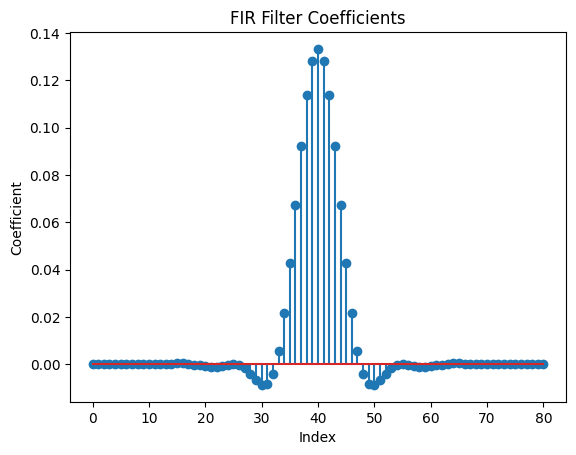

In [32]:
%matplotlib inline

plt.stem(coefficients2) # this plots the values of the coefficients of the FIR filter we created
plt.title('FIR Filter Coefficients')
plt.xlabel('Index')
plt.ylabel('Coefficient')

Text(0.5, 1.0, 'Amplitude Response of the Filter')

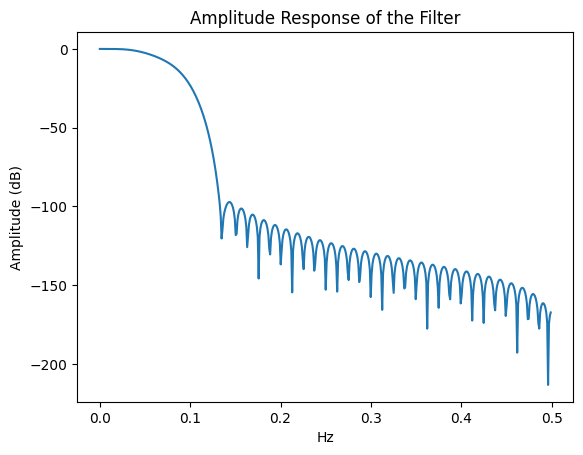

In [33]:
%matplotlib inline

w1,h1 = signal.freqz(coefficients2,fs = 1) #calculating the amplitude response of the filter
plt.plot(w1, 20*np.log10(abs(h1)))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Hz')
plt.title('Amplitude Response of the Filter')

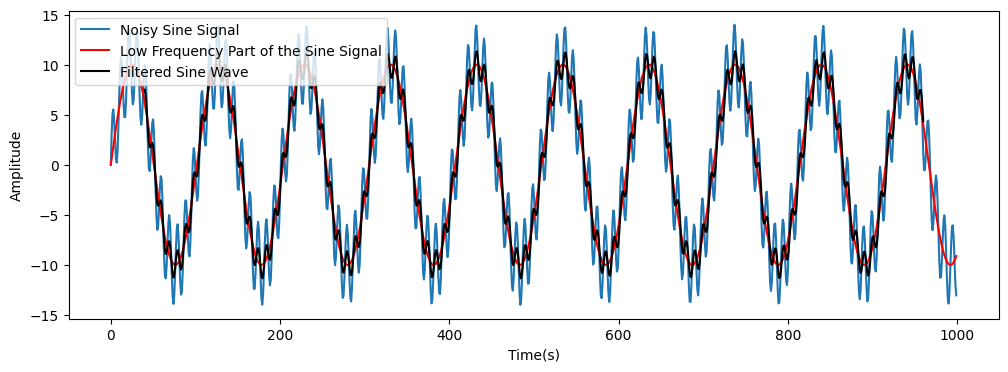

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,4))
lag2 = np.linspace((numtaps-1)/2,len(control)-((numtaps-1)/2),len(filtered_data2)) #lag created due to convolution
plt.plot(x,label='Noisy Sine Signal')
plt.plot(control,'r',label='Low Frequency Part of the Sine Signal')
plt.plot(lag2,filtered_data2,'k', label ='Filtered Sine Wave')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend()

Assignment
-----------


1. Write a function that uses FFT to replicate the results of `freqz` (Hint: look at the length of w,h returned by `freqz`. Think why it is so)
2. Write a function to plot the phase response of the filter as well, along with amplitude response (using only FFT as the previous question).
3. The filtered signal is not free from the high frequency "noise". Why is this so? Can you change the filter design parameters to fix this? Justify your changes.

# MAJOR HINT
### USE ANOTHER VERSION KNOWN AS RFFT: meant for real-values...